In [1]:
#Importing the Required Libraries

import numpy as np

#Data Loader
import pickle

import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('../src/')  

#### Import Data Loading and Processing Functions
from multimodal.helper_functions import  reproducible_comp, get_final_df, force_curve_reshape, acc_curves_reshape

#### Import Model Architecture
from visualization.plot_timeseries import plot_multi_label_time_series
from semi_supervised.augmentations import weak_augment, strong_augment

reproducible_comp()


In [2]:
file_path = "../data/processed_data/force_inner.pkl"
with open(file_path, 'rb') as picklefile:
    data = pickle.load(picklefile)

features_force_inner, category_force_inner, category_names, df_force_inner = get_final_df(data, is_acc_data=0, is_multilabel=1)

file_path = "../data/processed_data/acc_inner.pkl"
with open(file_path, 'rb') as picklefile:
    data = pickle.load(picklefile)

features_acc_inner, category_acc_inner, category_names, df_acc_inner = get_final_df(data, is_acc_data=1, is_multilabel=1)

In [3]:
file_path = "../data/processed_data/force_outer.pkl"
with open(file_path, 'rb') as picklefile:
    data = pickle.load(picklefile)

features_force_outer, category_force_outer, category_names, df_force_outer = get_final_df(data, is_acc_data=0, is_multilabel=1)

file_path = "../data/processed_data/acc_outer.pkl"
with open(file_path, 'rb') as picklefile:
    data = pickle.load(picklefile)

features_acc_outer, category_acc_outer, category_names, df_acc_outer = get_final_df(data, is_acc_data=1, is_multilabel=1)

In [4]:
merged_features_force = np.concatenate((features_force_inner,features_force_outer), axis=0)
merged_category_force = np.concatenate((category_force_inner,category_force_outer), axis=0)

merged_features_acc = np.concatenate((features_acc_inner,features_acc_outer), axis=0)
merged_category_acc = np.concatenate((category_acc_inner,category_acc_outer), axis=0)

In [5]:
labels_force = merged_category_force.copy()
features_force = merged_features_force.copy()
feat_force = force_curve_reshape(features_force)
print("Force Features Shape: ", feat_force.shape)
print("Force Labels Shape: ", labels_force.shape)

labels_acc = merged_category_acc.copy()
features_acc = merged_features_acc.copy()
feat_acc = acc_curves_reshape(features_acc)
print("Acceleration Features Shape: ", feat_acc.shape)
print("Acceleration Labels Shape: ", labels_acc.shape)

Force Features Shape:  (2680, 150)
Force Labels Shape:  (2680, 4)
Acceleration Features Shape:  (2680, 1500)
Acceleration Labels Shape:  (2680, 4)


# Force Curves Visualization

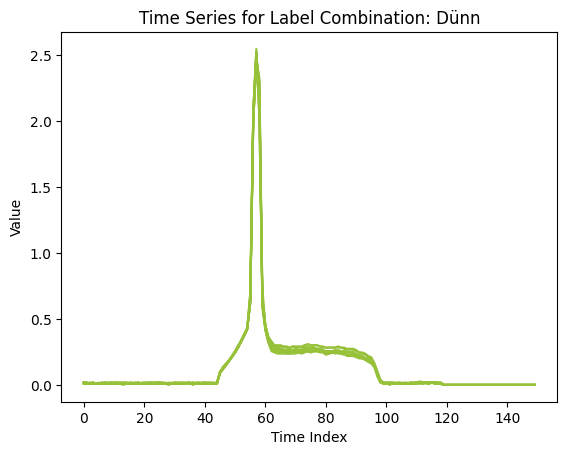

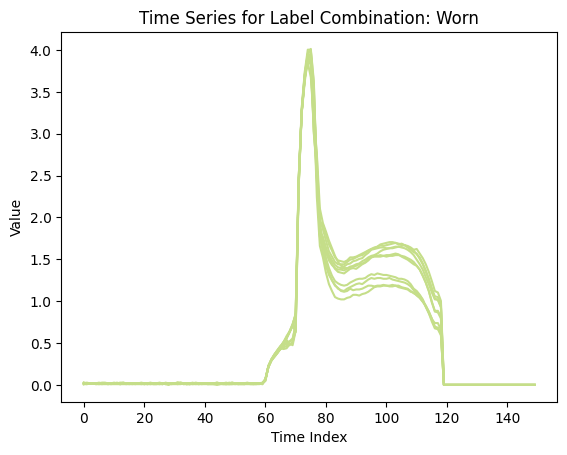

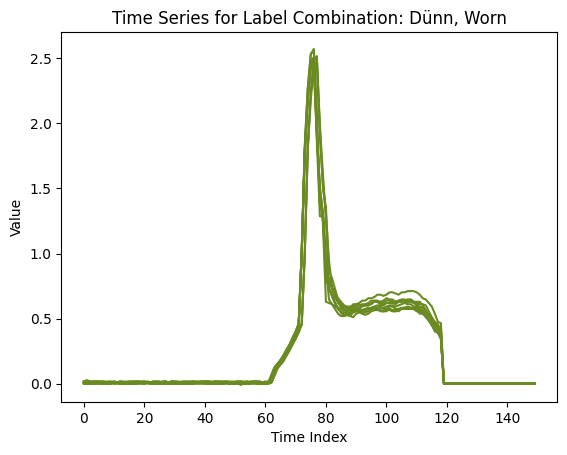

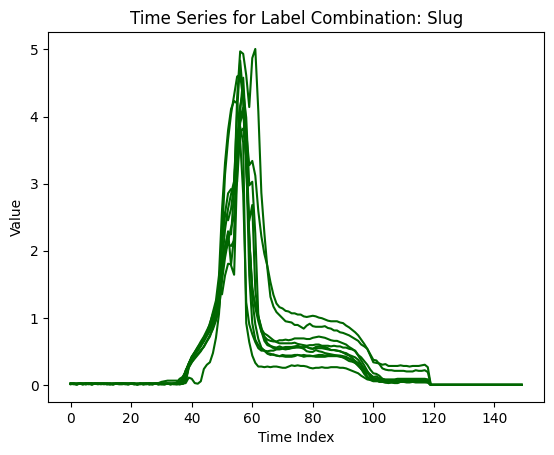

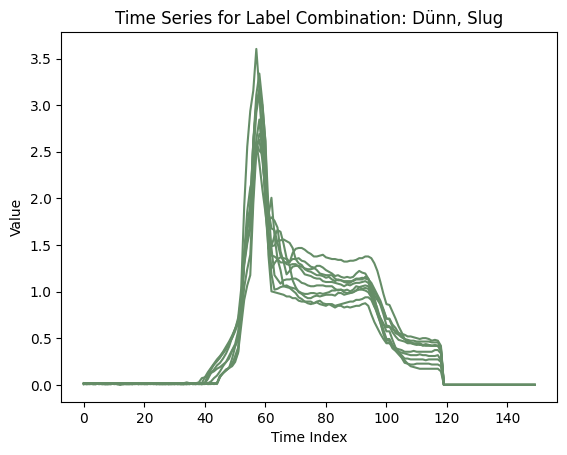

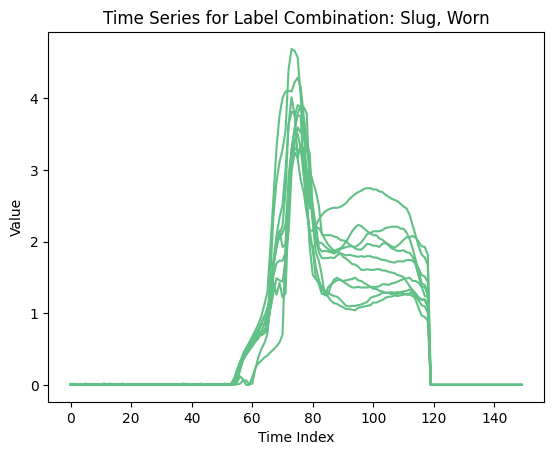

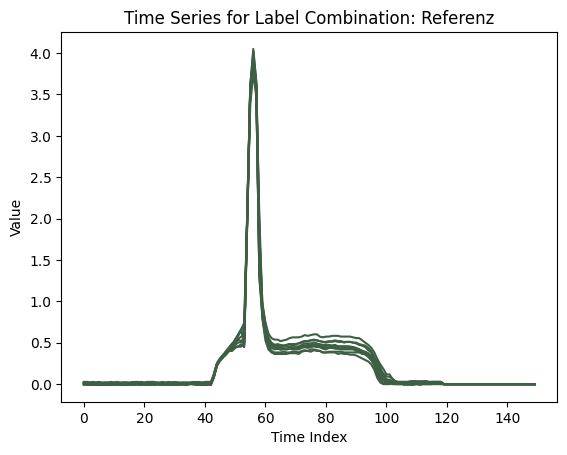

In [6]:
plot_multi_label_time_series(feat_force,labels_force,category_names)

# Acceleration Curves Visualization

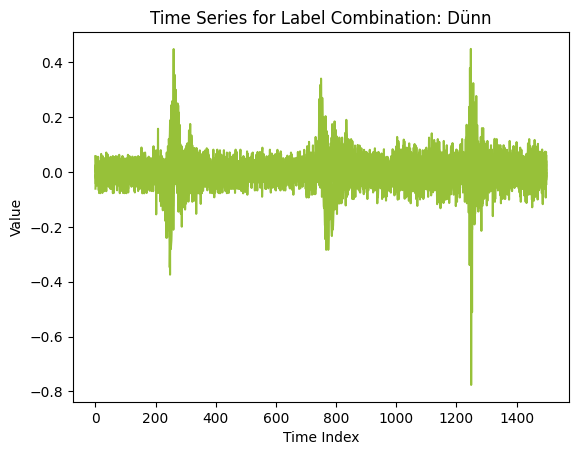

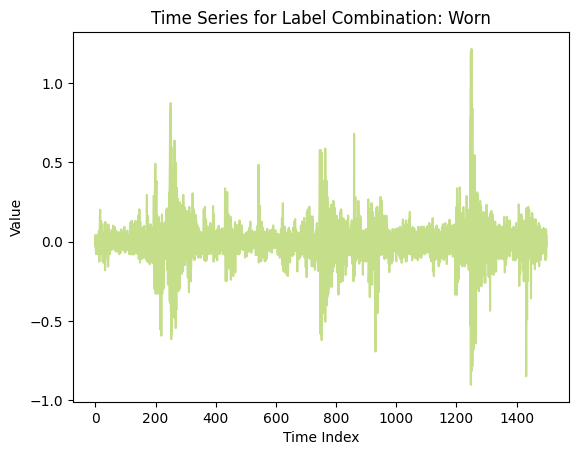

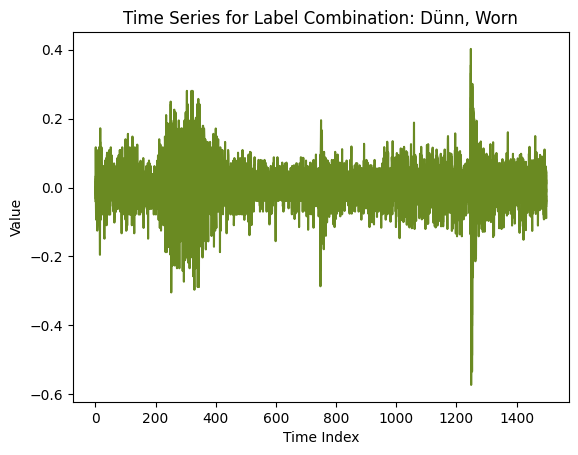

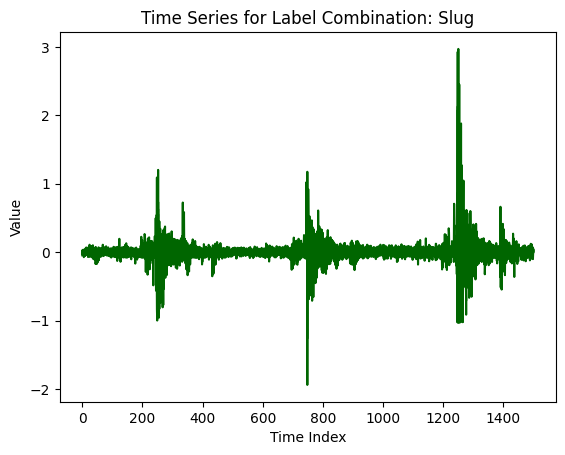

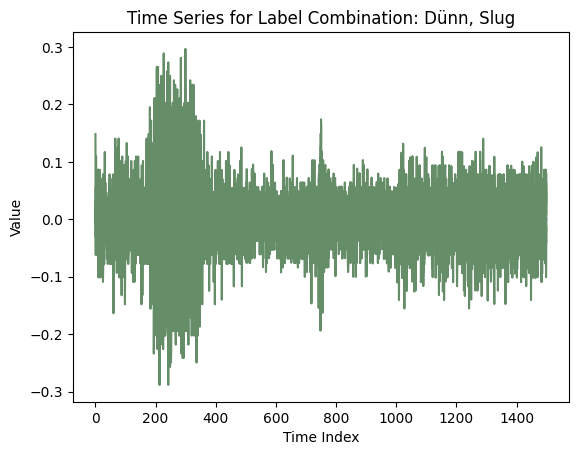

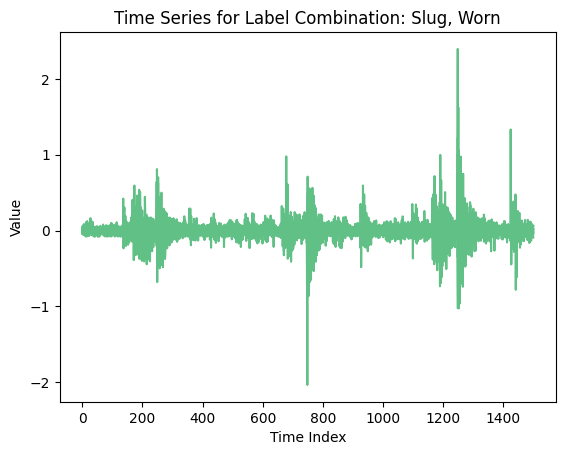

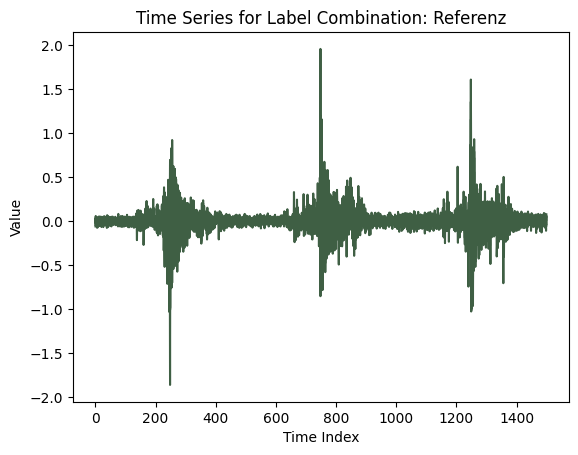

In [7]:
plot_multi_label_time_series(feat_acc,labels_acc,category_names)


# Force Strong Augmentation


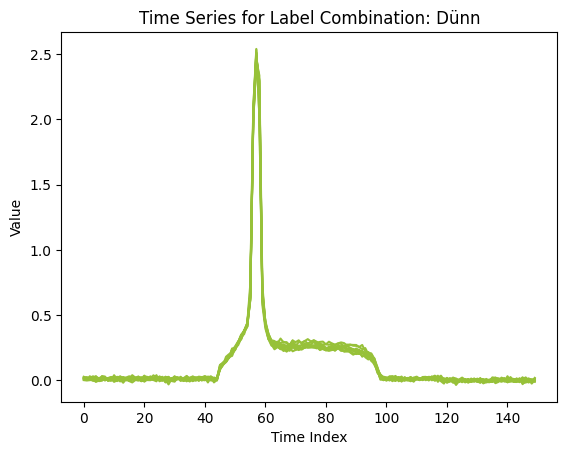

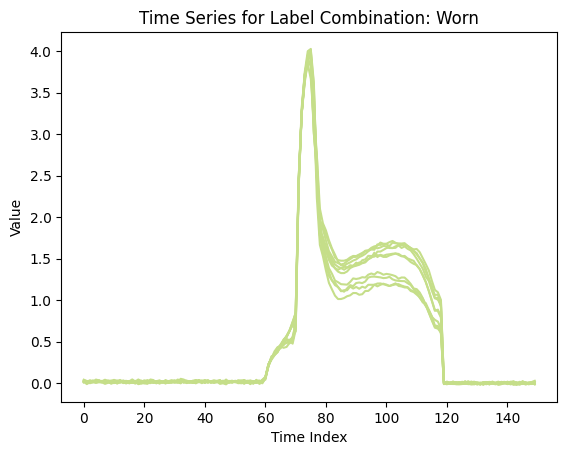

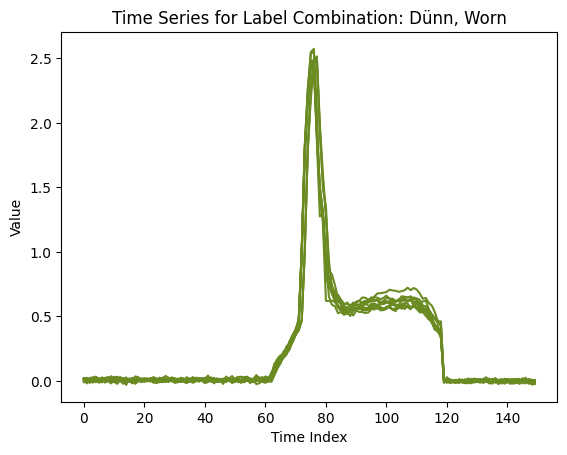

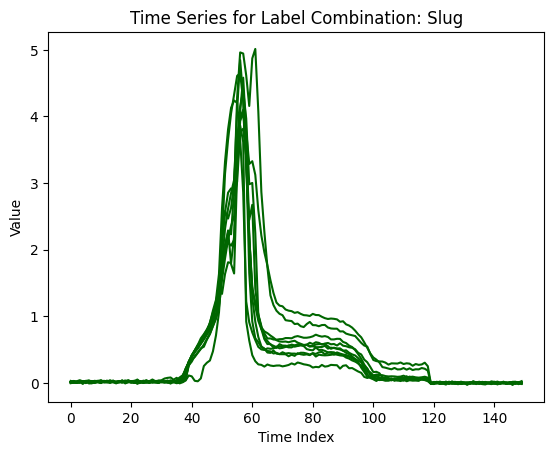

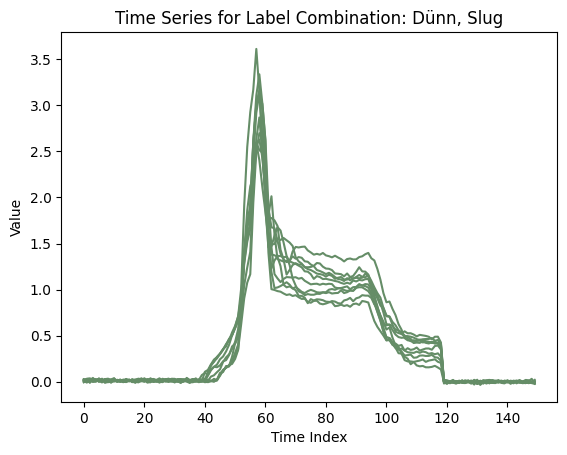

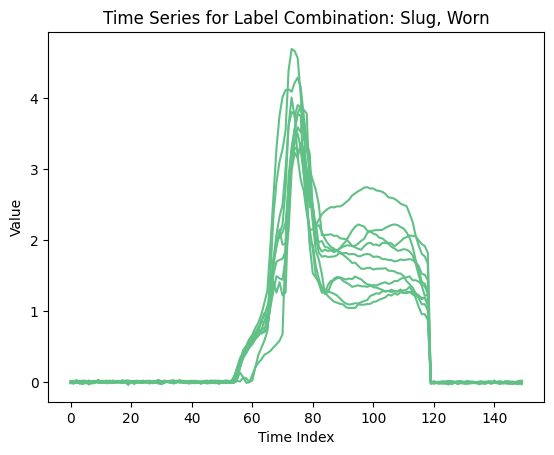

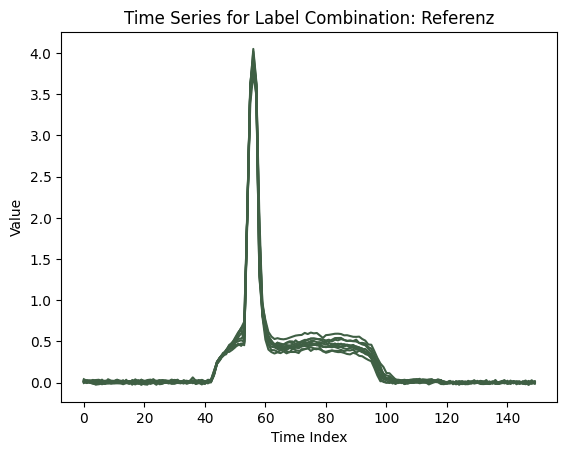

In [8]:
batch_size= len(feat_force)
feat_force_ = feat_force.reshape(-1, 1, feat_force.shape[1])
aug_feat = strong_augment(feat_force_, batch_size)
aug_feat=aug_feat.reshape(-1, aug_feat.shape[2])
# Run the function with the dataset, limiting to 10 series per class
plot_multi_label_time_series(aug_feat,labels_acc,category_names)


# Force Weak Augmentation


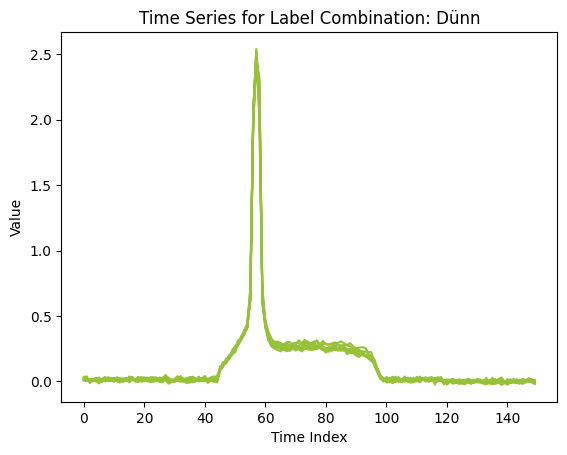

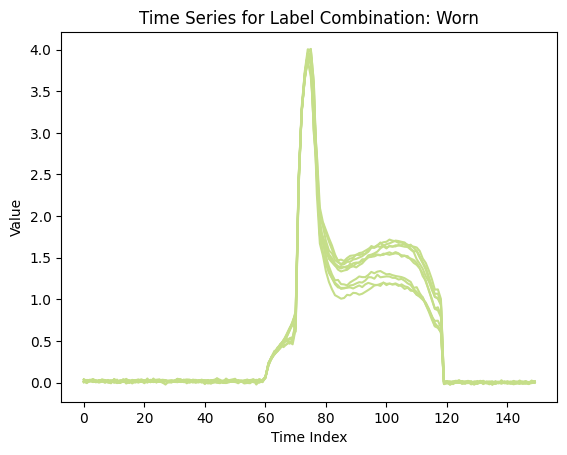

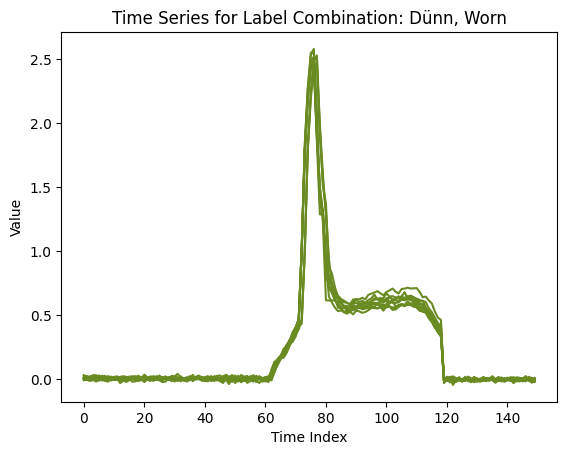

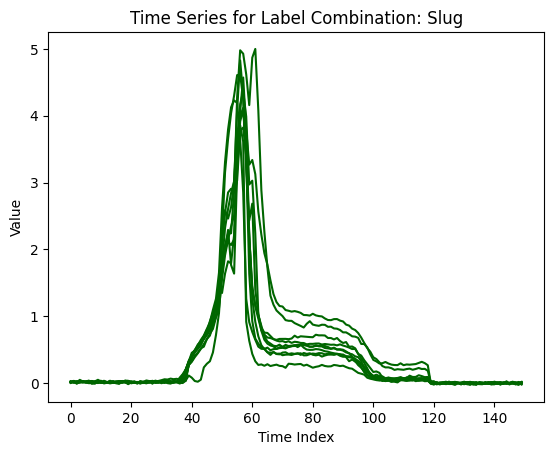

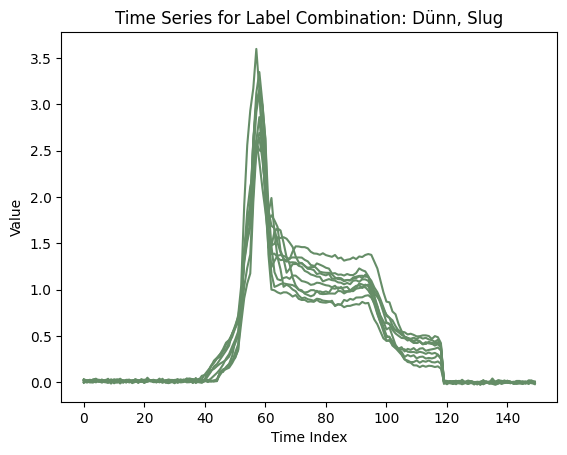

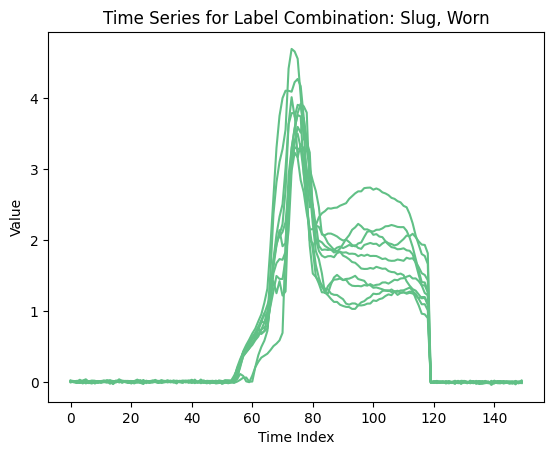

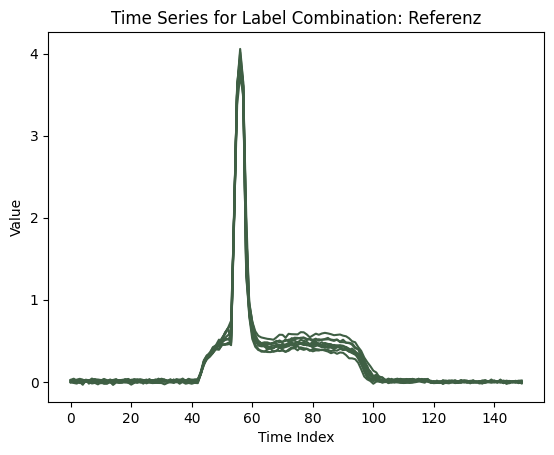

In [9]:
batch_size= len(feat_force)
feat_force_ = feat_force.reshape(-1, 1, feat_force.shape[1])
aug_feat = weak_augment(feat_force_, batch_size)
aug_feat=aug_feat.reshape(-1, aug_feat.shape[2])
# Run the function with the dataset, limiting to 10 series per class
plot_multi_label_time_series(aug_feat,labels_acc,category_names)


# Acceleration Strong Augmentation


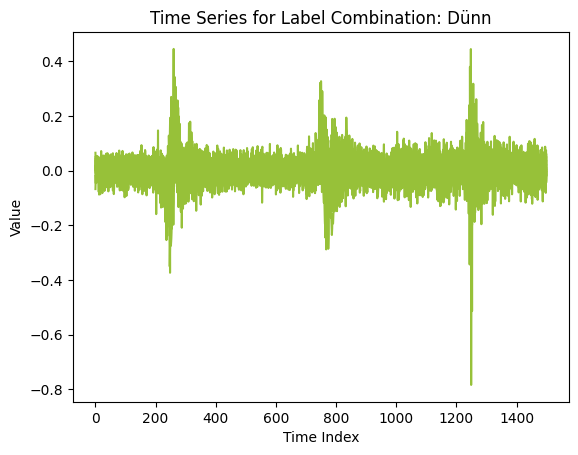

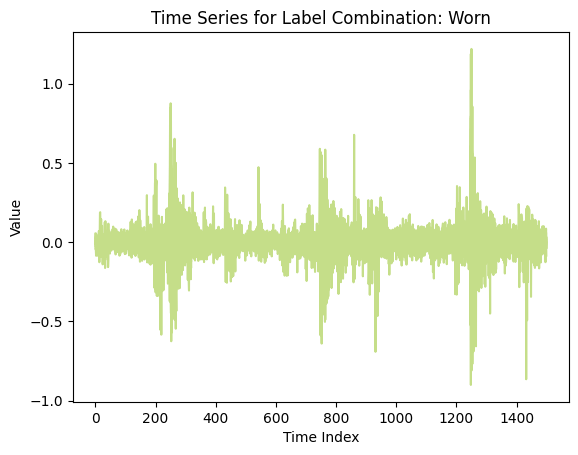

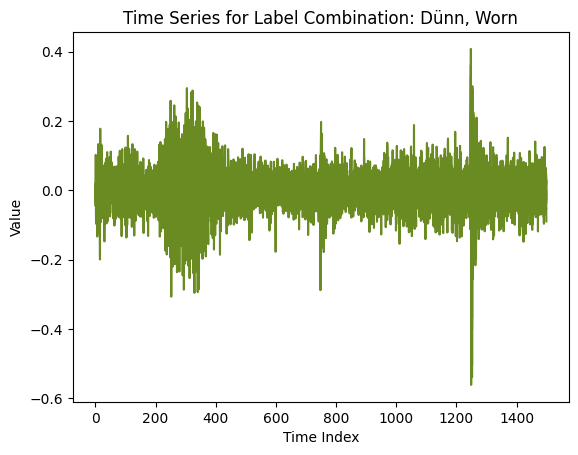

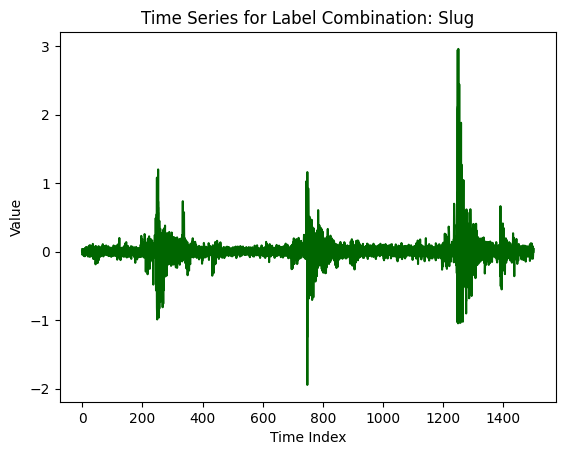

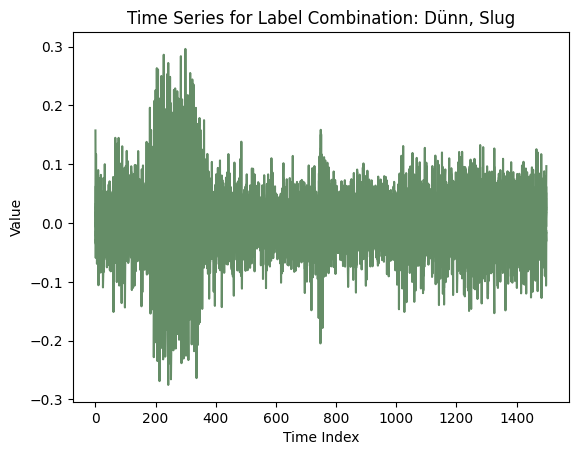

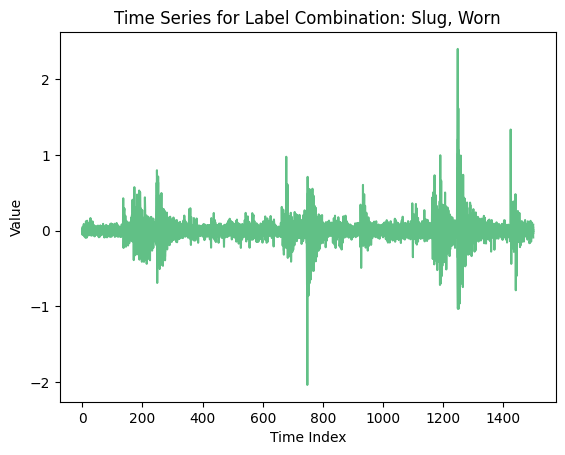

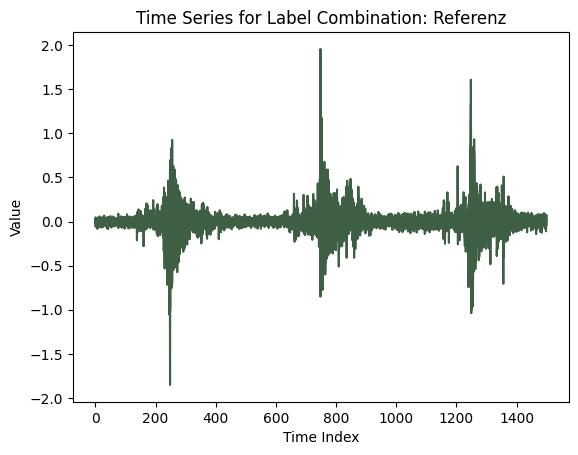

In [10]:
batch_size= len(feat_acc)
feat_acc_ = feat_acc.reshape(-1, 1, feat_acc.shape[1])
aug_feat = strong_augment(feat_acc_, batch_size)
aug_feat=aug_feat.reshape(-1, aug_feat.shape[2])
# Run the function with the dataset, limiting to 10 series per class
plot_multi_label_time_series(aug_feat,labels_acc,category_names)


# Accerleration Weak Augmentation


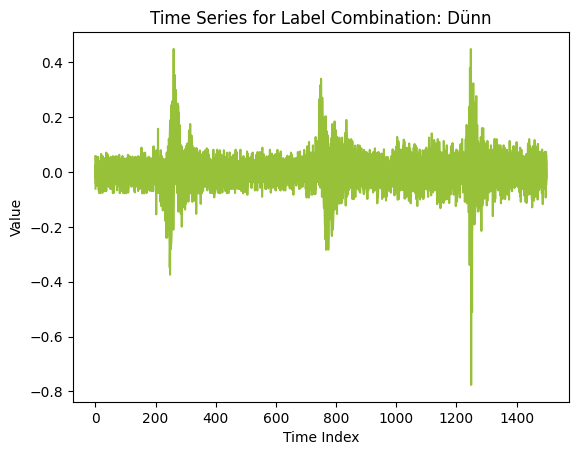

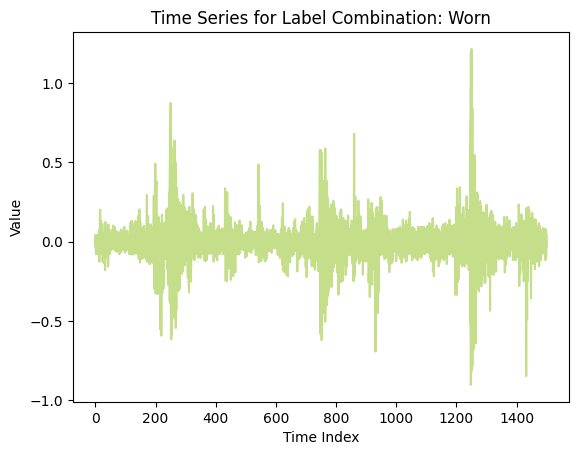

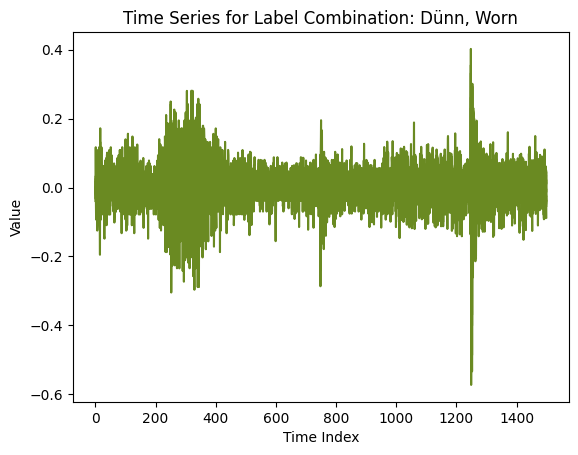

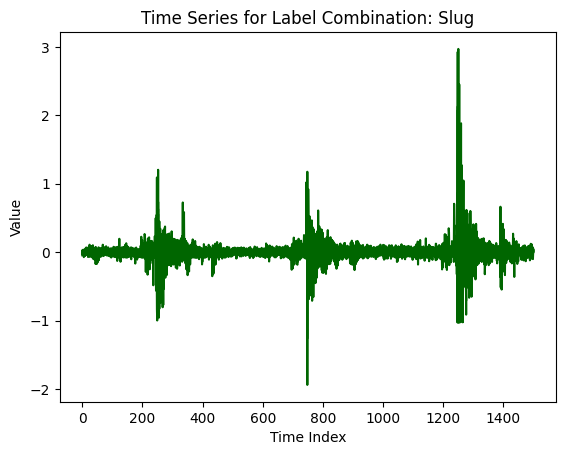

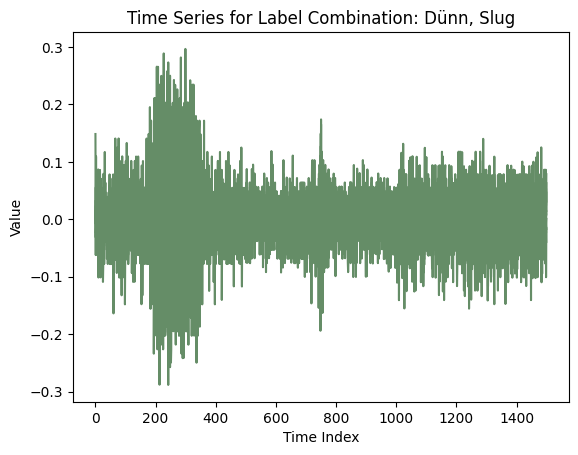

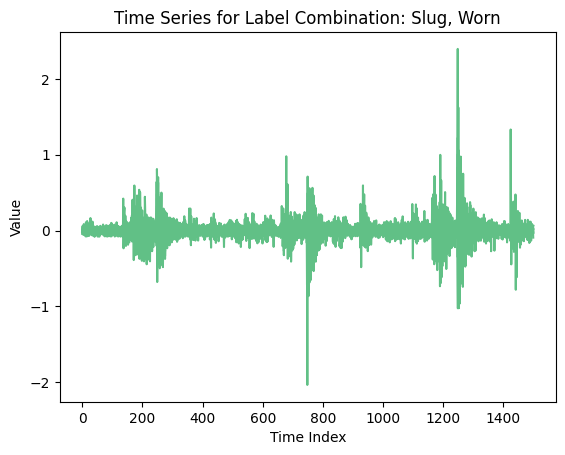

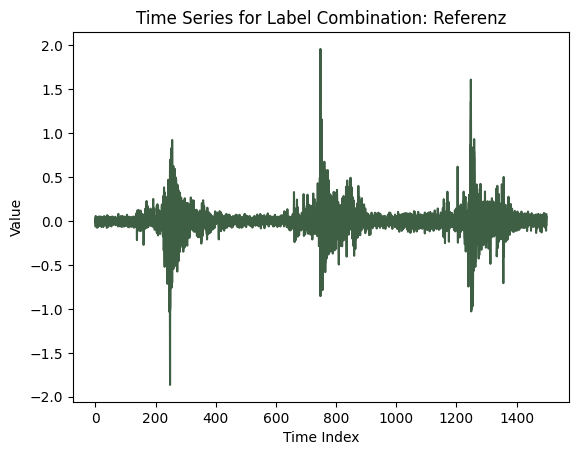

In [11]:

batch_size= len(feat_acc)
feat_acc_ = feat_acc.reshape(-1, 1, feat_acc.shape[1])
aug_feat = weak_augment(feat_acc_, batch_size)
aug_feat=aug_feat.reshape(-1, aug_feat.shape[2])
# Run the function with the dataset, limiting to 10 series per class
plot_multi_label_time_series(aug_feat,labels_acc,category_names)
